# Data Exploration

### Libraries

In [194]:
import numpy as np
from numpy.core.defchararray import add
import pandas as pd
import xlrd
import os
import plotly
import plotly.express as px

In [248]:
# New Libraries
from functools import reduce



In [247]:
# # install new library
# !pip install plotly
#!pip install matplotlib
#!pip install seaborn
!pip install statsmodels

### Load the pickles into data frames

In [227]:
df_hd = pd.read_pickle('houseAll.pkl')
df_jobs = pd.read_pickle('metroJobs.pkl')
df_pop = pd.read_pickle('metroPop.pkl')
df_hc = pd.read_pickle('metroHouse.pkl')
df_year_base = pd.read_pickle('yearTotals.pkl')
parcelNum = 'R2024320455'

## Stuff

In [5]:
df_hd.head(5)
#df_hd['GROUP'].nunique()
#df_hd.dtypes

,PARCEL,YEAR,ACREAGE,GROUP,TOWNSHIP,RANGE,SECTION,YR BUILT,REMODEL YR,DWELLINGS,...,GARAGE 1 SQ FT,GARAGE 1 TYPE,GARAGE 2 SQ FT,GARAGE 2 TYPE,POOL SQ FT,TAV,Sale Price,Sale Date,Neighborhood,Area
0,R0017650020,2000,0.246,AARON PARK SUB,3N,1E,1,1998,0,SFD,...,476,DETACHED,280,DETACHED,0,158000.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
1,R0017650030,2000,0.165,AARON PARK SUB,3N,1E,1,1999,0,SFD,...,280,DETACHED,0,NaN,0,165800.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
2,R0017650040,2000,0.144,AARON PARK SUB,3N,1E,1,1999,0,SFD,...,280,DETACHED,0,NaN,0,165800.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
3,R0017650050,2000,0.211,AARON PARK SUB,3N,1E,1,1998,0,SFD,...,0,NaN,0,NaN,0,155000.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
4,R0027000008,2000,0.270,ABBS SUB,3N,2E,21,1937,1992,SFD,...,240,DETACHED,940,DETACHED,0,129100.0,NaN,NaT,CENTRAL BOISE BENCH,BOISE BENCH


In [6]:
#df_hd.dtypes
df_hd['Neighborhood'].unique()

[NORTH CENTRAL BENCH, CENTRAL BOISE BENCH, WEST BOISE, OLD NORTH BOISE, NEW SOUTHEAST BOISE, ..., BARBER & HARRIS RANCH, SOUTH BOISE DESERT, SOUTHWEST BOISE, EAGLE RANCHETTES, SOUTH MERIDIAN]
Length: 27
Categories (26, object): [NORTH CENTRAL BENCH, CENTRAL BOISE BENCH, WEST BOISE, OLD NORTH BOISE, ..., SOUTH BOISE DESERT, SOUTHWEST BOISE, EAGLE RANCHETTES, SOUTH MERIDIAN]

In [229]:
# Abbreviated dataframe for all of the parcels
short_house = df_hd[['PARCEL','Year','Area','Neighborhood','TAV','Sale Price']]
short_house.head()

,PARCEL,Year,Area,Neighborhood,TAV,Sale Price
0,R0017650020,2000,W BOISE,NORTH CENTRAL BENCH,158000.0,NaN
1,R0017650030,2000,W BOISE,NORTH CENTRAL BENCH,165800.0,NaN
2,R0017650040,2000,W BOISE,NORTH CENTRAL BENCH,165800.0,NaN
3,R0017650050,2000,W BOISE,NORTH CENTRAL BENCH,155000.0,NaN
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN


In [233]:
#short_house.loc[short_house['PARCEL'] == parcelNum]
myN = short_house[short_house['Neighborhood'] == 'CENTRAL BOISE BENCH']
myN.to_pickle('myN.pkl')
myN.head()

,PARCEL,Year,Area,Neighborhood,TAV,Sale Price
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN
5,R0027000013,2000,BOISE BENCH,CENTRAL BOISE BENCH,85200.0,45000.0
6,R0027000018,2000,BOISE BENCH,CENTRAL BOISE BENCH,106700.0,79800.0
7,R0027000025,2000,BOISE BENCH,CENTRAL BOISE BENCH,46400.0,36000.0
8,R0027000030,2000,BOISE BENCH,CENTRAL BOISE BENCH,59600.0,57500.0


In [ ]:
myN.dtypes

### Searching code 

In [ ]:

#df_hd.loc[df_hd['GROUP'] == 'ELIZABETH PL']

#tBlock = short_house.loc[(short_house['TOWNSHIP'] == '3N')&(short_house['RANGE']=='2E')&(short_house['SECTION']==16)]

#tList = tBlock[tBlock['GROUP'].str.contains(r'GLEN)]
#tList.GROUP.unique()


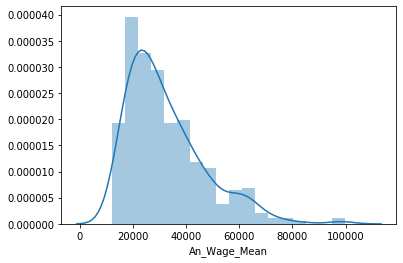

In [114]:
#fig1 = px.line(temp, x='An_Wage_Mean', y = 'An_Wage_Mean')
#temp = jobsSalery.loc[jobsSalery['An_Wage_Mean'].isna()]
#temp2
sns.distplot(temp['An_Wage_Mean'])


# Big merge for testing LM

In [245]:
jobTypes = pd.read_pickle('jobTypes.pkl')
jobSalery = pd.read_pickle('jobSalery.pkl')
yearTotals = pd.read_pickle('yearTotals.pkl')
myN = pd.read_pickle('myN.pkl')

dfs = [myN, jobTypes, jobSalery, yearTotals]
dfL = reduce(lambda left,right: pd.merge(left,right, on = 'Year'), dfs)
dfL

,PARCEL,Year,Area,Neighborhood,TAV,Sale Price,Architecture And Engineering Occupations,"Arts, Design, Entertainment, Sports, And Media Occupations",Building And Grounds Cleaning And Maintenance Occupations,Business And Financial Operations Occupations,...,Sales And Related Occupations,Transportation And Material Moving Occupations,"(10000, 40000]","(100000, 150000]","(150000, 200000]","(200000, 300000]","(40000, 70000]","(70000, 100000]",TotalHouse,TotalPop
0,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
1,R0027000013,2000,BOISE BENCH,CENTRAL BOISE BENCH,85200.0,45000.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
2,R0027000018,2000,BOISE BENCH,CENTRAL BOISE BENCH,106700.0,79800.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
3,R0027000025,2000,BOISE BENCH,CENTRAL BOISE BENCH,46400.0,36000.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
4,R0027000030,2000,BOISE BENCH,CENTRAL BOISE BENCH,59600.0,57500.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
5,R0027000035,2000,BOISE BENCH,CENTRAL BOISE BENCH,80700.0,NaN,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
6,R0027000040,2000,BOISE BENCH,CENTRAL BOISE BENCH,167400.0,NaN,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
7,R0027000047,2000,BOISE BENCH,CENTRAL BOISE BENCH,98100.0,97000.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
8,R0027000050,2000,BOISE BENCH,CENTRAL BOISE BENCH,85100.0,84000.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017
9,R0027000060,2000,BOISE BENCH,CENTRAL BOISE BENCH,80600.0,44970.0,12860.0,2730.0,7570.0,9560.0,...,21960.0,14930.0,150080.0,0.0,0.0,0.0,34980.0,3710.0,182764,469017


In [250]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
x = pd.DataFrame(np.c)
y = ['T']

In [253]:
dfL.describe()

,TAV,Sale Price,Architecture And Engineering Occupations,"Arts, Design, Entertainment, Sports, And Media Occupations",Building And Grounds Cleaning And Maintenance Occupations,Business And Financial Operations Occupations,Community And Social Service Occupations,Computer And Mathematical Occupations,Construction And Extraction Occupations,"Education, Training, And Library Occupations",...,Sales And Related Occupations,Transportation And Material Moving Occupations,"(10000, 40000]","(100000, 150000]","(150000, 200000]","(200000, 300000]","(40000, 70000]","(70000, 100000]",TotalHouse,TotalPop
count,1.533600e+05,1.162850e+05,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,145514.000000,137884.000000,...,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000,153360.000000
mean,1.403978e+05,1.028396e+05,8243.429382,3700.455203,8435.411907,11486.261868,4384.168623,7492.268975,13927.215801,13707.883438,...,27286.274452,16309.274061,155988.188380,3566.468897,217.373109,419.900235,59606.406690,16869.106742,237527.145370,603203.706742
std,9.015753e+04,8.275732e+04,1718.812880,799.170661,829.015240,1738.024146,995.273112,1052.235823,2847.768591,2103.079957,...,3254.360687,1640.133736,13739.429809,2560.094471,191.569020,430.985529,13647.591399,8709.855304,28348.976262,75549.628707
min,1.000000e+03,6.000000e+03,6770.000000,2480.000000,7570.000000,9030.000000,2790.000000,5630.000000,10490.000000,9690.000000,...,21410.000000,13990.000000,129450.000000,0.000000,0.000000,0.000000,34980.000000,3710.000000,182764.000000,469017.000000
25%,9.570000e+04,6.000000e+04,7070.000000,2860.000000,7790.000000,9630.000000,3270.000000,6700.000000,11790.000000,11910.000000,...,24540.000000,14880.000000,146070.000000,1160.000000,0.000000,0.000000,45570.000000,5710.000000,210207.000000,525975.000000
50%,1.243000e+05,8.800000e+04,7450.000000,3450.000000,8020.000000,11440.000000,4610.000000,7580.000000,13620.000000,14480.000000,...,26880.000000,16040.000000,156420.000000,3490.000000,220.000000,370.000000,60680.000000,21670.000000,244823.000000,611341.000000
75%,1.616000e+05,1.270000e+05,8660.000000,4520.000000,8740.000000,12410.000000,5200.000000,8540.000000,15610.000000,15590.000000,...,30030.000000,17450.000000,167110.000000,5170.000000,380.000000,860.000000,67660.000000,23170.000000,257568.000000,662777.000000
max,3.965500e+06,3.380185e+06,12860.000000,4960.000000,10340.000000,14780.000000,5480.000000,8900.000000,19070.000000,16600.000000,...,32480.000000,19430.000000,177950.000000,9860.000000,550.000000,1130.000000,88130.000000,27880.000000,282300.000000,730426.000000


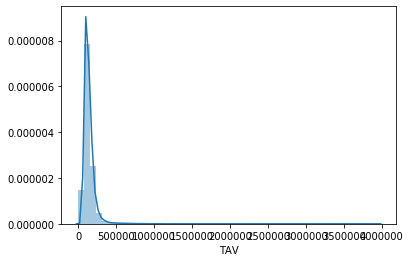

In [252]:
sns.distplot(dfL['TAV'])

In [240]:
#myN.info()
#jobTypes.info()
#jobSalery.info()
yearTotals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
Year          19 non-null category
TotalHouse    19 non-null int64
TotalPop      19 non-null int64
dtypes: category(1), int64(2)
memory usage: 555.0 bytes


# Fixing the data for graphing and analysis

In [76]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')

In [ ]:
myN00 = myN[myN['YEAR'] == 2000]
myN00.to_pickle('myN00.pkl')
myN00.head()

In [ ]:
sns.distplot(myN00['TAV'])

$z$ - score $ = \frac{x-\mu}{\sigma}$

In [ ]:
#mean
myNmean = myN['TAV'].mean()

# standard deviation
myNsd = myN['TAV'].std()

myN00['Z-Score'] = (myN00['TAV']-myNmean)/myNsd

myN00.to_pickle('myN00.pkl')
myN00.head()
#myNmean
#myNsd

In [ ]:
myN00['Z-Score'].min()
myN00['Z-Score'].min()
#sns.distplot(myN00['Z-Score'])

# Make df for all neighborhoods over each year

In [ ]:
# make list of neighborhoods

# make list of years

In [ ]:
# make a fn to make a vector for average house $ for a neighborhood for each year





In [ ]:
# make a df where each column is one of the vectors made from the fn




In [ ]:
myN00 = pd.read_pickle('myN00.pkl')

myN00F = myN00.loc[(myN00['Z-Score'] <= 3) & (myN00['Z-Score'] >= -3) ]
#myN00 = myN00.drop(myN00[myN00['Z-Score'] <= 3].index, inplace = True)
#myN00['Z-Score'].max()
myN00F.head()

In [ ]:
myN00['Z-Score'].max()

In [ ]:
myN00.shape

In [ ]:
sns.distplot(myN00F['TAV'], color = "maroon")

## Figure out IQR
$$IQR = Q3-Q1$$
Outliers:
    $$<(Q1 - 1.5 * IQR)$$
    $$>(Q3 + 1.5 * IQR)$$

In [ ]:
myN00q1 = myN00['TAV'].quantile(0.25)
myN00q3 = myN00['TAV'].quantile(0.75)
myN00iqr = myN00q3 - myN00q1
iqrMax = myN00q3 + (1.5*myN00iqr)
iqrMin = myN00q1 - (1.5*myN00iqr)
myN00iqr

In [ ]:
myN00 = pd.read_pickle('myN00.pkl')
myN00i = myN00[(myN00['TAV']<iqrMax) & (myN00['TAV'] > iqrMin)]
myN00i['TAV'].max()

In [ ]:
print(myN00F['TAV'].max())
print(myN00q3+(1.5*myN00iqr))

In [ ]:
sns.distplot(myN00i['TAV'])
#sns.distplot(myN00F['TAV'], color = "maroon")

In [ ]:
myN00i['TAV'].hist()

In [ ]:
#df_year_base

import plotly
import plotly.express as px

fig1 = px.line(df_year_base, x='Year', y = 'TotalHouse')
fig2 = px.line(df_year_base, x='Year', y = 'TotalPop')
fig2.show()

In [ ]:
df_year_base.info()

# Graph Stuff

In [ ]:
import plotly
import plotly.express as px

fig1 = px.box(mySec, x='YEAR', y = 'TAV')
fig1.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =go.Scatter(
        x = mySec['YEAR'],
        y = mySec['TAV']))

fig.show()

### Look into z-scores for trimming the outliers
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba